# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
weather_api_key = "IMPORT API KEY... I had to purchase it for it to work"

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 614


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + "IMPORT YOUR WEATHER API"



# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city

    city_url = url + '&q=' + city 

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
       

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather ["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port elizabeth
Processing Record 2 of Set 1 | yarmouth
Processing Record 3 of Set 1 | bar-le-duc
Processing Record 4 of Set 1 | hithadhoo
Processing Record 5 of Set 1 | port hardy
Processing Record 6 of Set 1 | humaita
Processing Record 7 of Set 1 | aklavik
Processing Record 8 of Set 1 | shingu
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | ihosy
Processing Record 11 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 12 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 13 of Set 1 | klyuchi
Processing Record 14 of Set 1 | orlik
Processing Record 15 of Set 1 | te anau
Processing Record 16 of Set 1 | lokosovo
Processing Record 17 of Set 1 | victoria
Processing Record 18 of Set 1 | bluff
Processing Record 19 of Set 1 | yulara
Processing Record 20 of Set 1 | yellowknife
Processing Record 21 of Set 1 | severo-kurilsk
Processing Record 22 of Se

Processing Record 38 of Set 4 | ossora
Processing Record 39 of Set 4 | fez
Processing Record 40 of Set 4 | kilembe
Processing Record 41 of Set 4 | puri
Processing Record 42 of Set 4 | yatou
Processing Record 43 of Set 4 | vostok
Processing Record 44 of Set 4 | sorland
Processing Record 45 of Set 4 | mlonggo
Processing Record 46 of Set 4 | skalistyy
City not found. Skipping...
Processing Record 47 of Set 4 | nanortalik
Processing Record 48 of Set 4 | castro
Processing Record 49 of Set 4 | codrington
Processing Record 0 of Set 5 | victor harbor
Processing Record 1 of Set 5 | honavar
Processing Record 2 of Set 5 | roebourne
Processing Record 3 of Set 5 | beloha
Processing Record 4 of Set 5 | tshikapa
Processing Record 5 of Set 5 | zaragoza
Processing Record 6 of Set 5 | okhotsk
Processing Record 7 of Set 5 | chifeng
Processing Record 8 of Set 5 | lao cai
Processing Record 9 of Set 5 | kasongo-lunda
Processing Record 10 of Set 5 | bandarbeyla
Processing Record 11 of Set 5 | noyabrsk
Proces

Processing Record 28 of Set 8 | chkalovskoye
Processing Record 29 of Set 8 | iqaluit
Processing Record 30 of Set 8 | derzhavinsk
Processing Record 31 of Set 8 | haines junction
Processing Record 32 of Set 8 | azul
Processing Record 33 of Set 8 | coahuayana
Processing Record 34 of Set 8 | la paz
Processing Record 35 of Set 8 | ambon
Processing Record 36 of Set 8 | karaul
City not found. Skipping...
Processing Record 37 of Set 8 | ovalle
Processing Record 38 of Set 8 | perry
Processing Record 39 of Set 8 | vallenar
Processing Record 40 of Set 8 | coquimbo
Processing Record 41 of Set 8 | mentok
City not found. Skipping...
Processing Record 42 of Set 8 | krasnoselkup
Processing Record 43 of Set 8 | norman wells
Processing Record 44 of Set 8 | caravelas
Processing Record 45 of Set 8 | padang
Processing Record 46 of Set 8 | kollumerland
City not found. Skipping...
Processing Record 47 of Set 8 | andenes
Processing Record 48 of Set 8 | tuatapere
Processing Record 49 of Set 8 | jijiga
Processi

Processing Record 18 of Set 12 | kamaishi
Processing Record 19 of Set 12 | souillac
Processing Record 20 of Set 12 | ulsteinvik
Processing Record 21 of Set 12 | torres
Processing Record 22 of Set 12 | jinka
Processing Record 23 of Set 12 | plerin
Processing Record 24 of Set 12 | vao
Processing Record 25 of Set 12 | karratha
Processing Record 26 of Set 12 | praia da vitoria
Processing Record 27 of Set 12 | rundu
Processing Record 28 of Set 12 | athabasca
Processing Record 29 of Set 12 | novosokolniki
Processing Record 30 of Set 12 | sambava
Processing Record 31 of Set 12 | henzada
City not found. Skipping...
Processing Record 32 of Set 12 | zhanaozen
Processing Record 33 of Set 12 | gebre guracha
Processing Record 34 of Set 12 | sakakah
Processing Record 35 of Set 12 | kondinskoye
Processing Record 36 of Set 12 | balimo
City not found. Skipping...
Processing Record 37 of Set 12 | uyskoye
Processing Record 38 of Set 12 | shirokiy
Processing Record 39 of Set 12 | bonthe
Processing Record 

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df

City      Lat       Lng  Max Temp  Humidity  \
0             port elizabeth -33.9180   25.5701     63.10        77   
1                   yarmouth  41.7057  -70.2286     57.96        56   
2                 bar-le-duc  48.7500    5.1667     42.22        95   
3                  hithadhoo  -0.6000   73.0833     83.21        73   
4                 port hardy  50.6996 -127.4199     42.58        82   
..                       ...      ...       ...       ...       ...   
555                   mehran  33.1222   46.1646     83.95        23   
556               winchester  51.0651   -1.3187     58.53        33   
557             vila do maio  15.1333  -23.2167     77.79        78   
558                    alofi -19.0595 -169.9187     75.09        94   
559  san carlos de bariloche -41.1456  -71.3082     70.45        45   

     Cloudiness  Wind Speed Country        Date  
0            20       34.52      ZA  1682010976  
1             0       11.50      US  1682011028  
2           100        7.34      FR  1682011028  
3            99        5.95      MV  1682011028  
4           100       36.33      CA  1682010925  
..          ...         ...     ...         ...  
555         100        3.40      IR  1682011082  
556           0       18.41      GB  1682011082  
557          40       19.95      CV  1682011083  
558         100       10.36      NU  1682011042  
559           0        6.91      AR  1682011083  

[560 rows x 9 columns]

In [6]:
# Display sample data
city_data_df.head()

City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
0  port elizabeth -33.9180   25.5701     63.10        77          20   
1        yarmouth  41.7057  -70.2286     57.96        56           0   
2      bar-le-duc  48.7500    5.1667     42.22        95         100   
3       hithadhoo  -0.6000   73.0833     83.21        73          99   
4      port hardy  50.6996 -127.4199     42.58        82         100   

   Wind Speed Country        Date  
0       34.52      ZA  1682010976  
1       11.50      US  1682011028  
2        7.34      FR  1682011028  
3        5.95      MV  1682011028  
4       36.33      CA  1682010925

In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
City_ID                                                                      
0        port elizabeth -33.9180   25.5701     63.10        77          20   
1              yarmouth  41.7057  -70.2286     57.96        56           0   
2            bar-le-duc  48.7500    5.1667     42.22        95         100   
3             hithadhoo  -0.6000   73.0833     83.21        73          99   
4            port hardy  50.6996 -127.4199     42.58        82         100   

         Wind Speed Country        Date  
City_ID                                  
0             34.52      ZA  1682010976  
1             11.50      US  1682011028  
2              7.34      FR  1682011028  
3              5.95      MV  1682011028  
4             36.33      CA  1682010925

### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

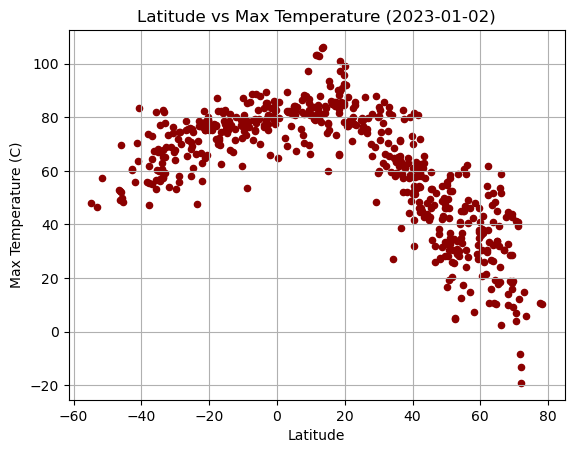

In [9]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot.scatter(x='Lat', y='Max Temp', c= 'DarkRed')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('Latitude vs Max Temperature (2023-01-02)')
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

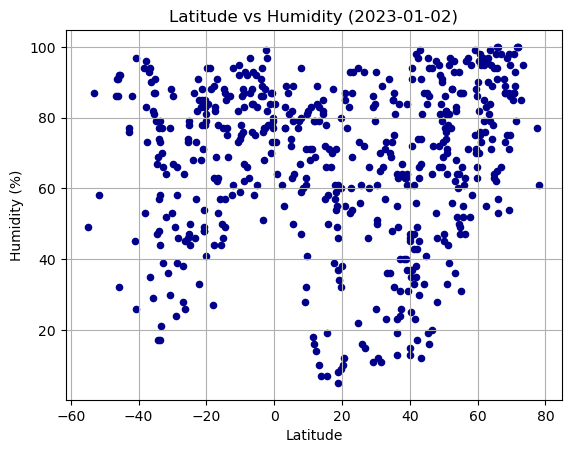

In [10]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot.scatter(x='Lat', y='Humidity', c= 'DarkBlue')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Latitude vs Humidity (2023-01-02)')
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

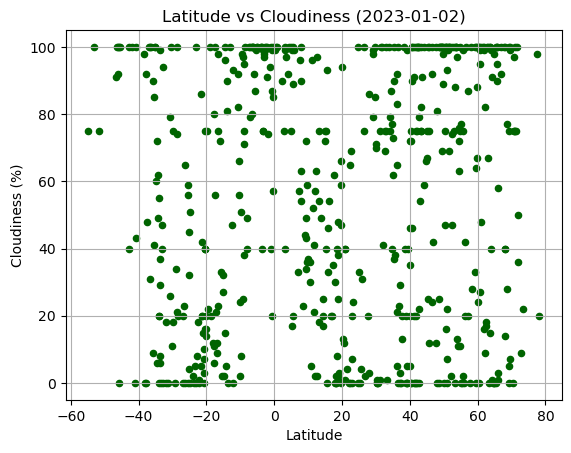

In [11]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot.scatter(x='Lat', y='Cloudiness', c= 'DarkGreen')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Latitude vs Cloudiness (2023-01-02)')
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

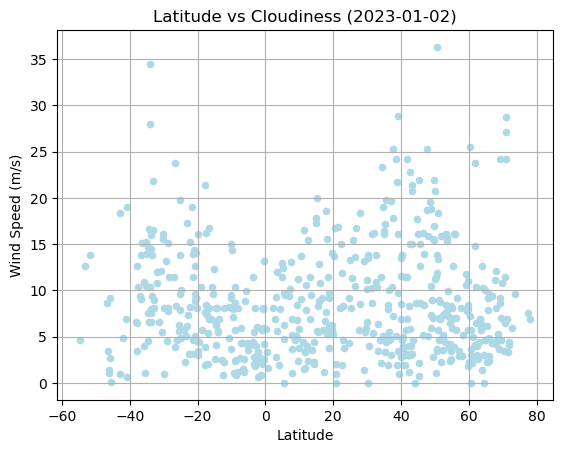

In [12]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot.scatter(x='Lat', y='Wind Speed', c= 'LightBlue')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('Latitude vs Cloudiness (2023-01-02)')
plt.grid()


# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
def lin_regression(hemi,x,y,a,b):
    x_value = hemi[x]
    y_value = hemi[y]
    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_value, y_value)
    regress_values = x_value * slope + intercept
    
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    plt.scatter(x_value,y_value)
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")
    plt.plot(x_value,regress_values,"r-")
    print(f"The r-value is: {rvalue**2}")
    print(line_eq)
        

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)

northern_hemi_df = city_data_df.loc[city_data_df['Lat']>=0]

# Display sample data
northern_hemi_df.head()

City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
City_ID                                                                  
1          yarmouth  41.7057  -70.2286     57.96        56           0   
2        bar-le-duc  48.7500    5.1667     42.22        95         100   
4        port hardy  50.6996 -127.4199     42.58        82         100   
6           aklavik  68.2191 -135.0107     14.00        73          40   
7            shingu  33.7333  135.9833     59.61        91         100   

         Wind Speed Country        Date  
City_ID                                  
1             11.50      US  1682011028  
2              7.34      FR  1682011028  
4             36.33      CA  1682010925  
6              4.61      CA  1682011029  
7              4.65      JP  1682011029

In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat']<0]

# Display sample data
southern_hemi_df.head()

City      Lat      Lng  Max Temp  Humidity  Cloudiness  \
City_ID                                                                     
0        port elizabeth -33.9180  25.5701     63.10        77          20   
3             hithadhoo  -0.6000  73.0833     83.21        73          99   
5               humaita  -7.5061 -63.0208     88.54        63         100   
8               ushuaia -54.8000 -68.3000     47.86        49          75   
9                 ihosy -22.4000  46.1167     66.85        91          18   

         Wind Speed Country        Date  
City_ID                                  
0             34.52      ZA  1682010976  
3              5.95      MV  1682011028  
5              2.66      BR  1682011029  
8              4.61      AR  1682010826  
9              3.15      MG  1682011029

###  Temperature vs. Latitude Linear Regression Plot

In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat']<0]

# Display sample data
southern_hemi_df.head()

City      Lat      Lng  Max Temp  Humidity  Cloudiness  \
City_ID                                                                     
0        port elizabeth -33.9180  25.5701     63.10        77          20   
3             hithadhoo  -0.6000  73.0833     83.21        73          99   
5               humaita  -7.5061 -63.0208     88.54        63         100   
8               ushuaia -54.8000 -68.3000     47.86        49          75   
9                 ihosy -22.4000  46.1167     66.85        91          18   

         Wind Speed Country        Date  
City_ID                                  
0             34.52      ZA  1682010976  
3              5.95      MV  1682011028  
5              2.66      BR  1682011029  
8              4.61      AR  1682010826  
9              3.15      MG  1682011029

The r-squared is: 0.7275523383391348


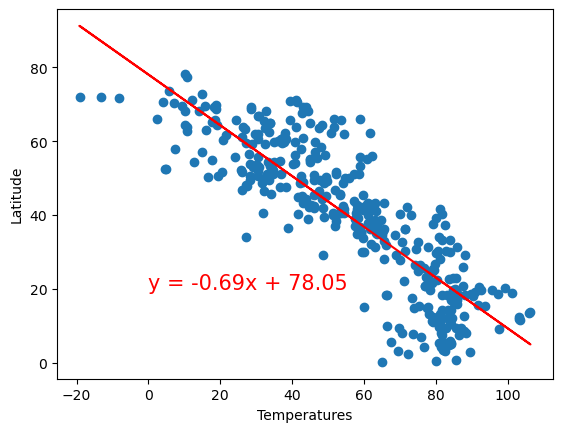

In [19]:
# Linear regression on Northern Hemisphere
#lin_regression(northern_hemi_df,'Lat', 'Max Temp', 45,20)
#plt.xlabel('Latitude')
#plt.ylabel('Max Temp (C)')
#plt.show()

# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Max Temp']
y_values = northern_hemi_df["Lat"]


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,20),fontsize=15,color="red")


plt.xlabel('Temperatures')
plt.ylabel('Latitude')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.489542237981069


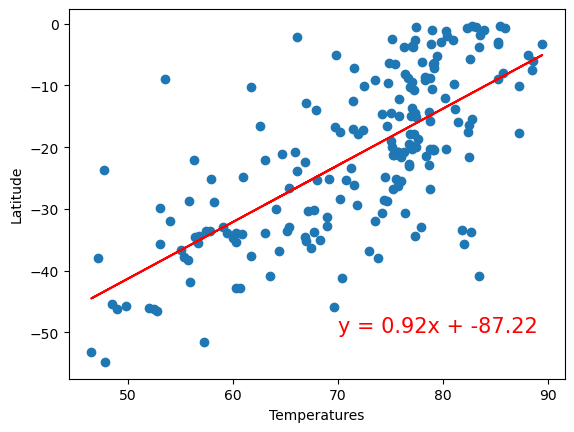

In [20]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Max Temp']
y_values = southern_hemi_df["Lat"]


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(70,-50),fontsize=15,color="red")


plt.xlabel('Temperatures')
plt.ylabel('Latitude')
print(f"The r-squared is: {rvalue**2}")
plt.show()


**Discussion about the linear relationship:** As the latitude gets closer to 0 the more the temperature increases and as you get further away from 0 the more the temperature decreases.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.0851261534160596


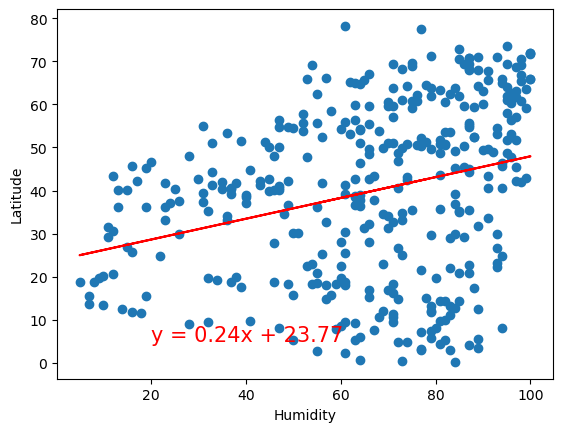

In [21]:
# Northern Hemisphere

x_values = northern_hemi_df['Humidity']
y_values = northern_hemi_df["Lat"]


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,5),fontsize=15,color="red")


plt.xlabel('Humidity')
plt.ylabel('Latitude')
print(f"The r-squared is: {rvalue**2}")
plt.show()


The r-squared is: 0.059788723071105984


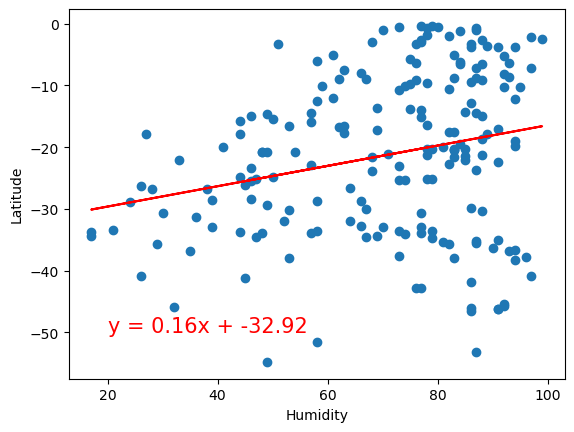

In [22]:
# Southern Hemisphere
x_values = southern_hemi_df['Humidity']
y_values = southern_hemi_df["Lat"]


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,-50),fontsize=15,color="red")


plt.xlabel('Humidity')
plt.ylabel('Latitude')
print(f"The r-squared is: {rvalue**2}")
plt.show()


**Discussion about the linear relationship:** As the latitude get closer to 0 there may be a possibility that humidity increases but keep in my that the r square isn't that high and the line is flatter in this scenario compared to the previous scenario about temperature. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.010106036258135087


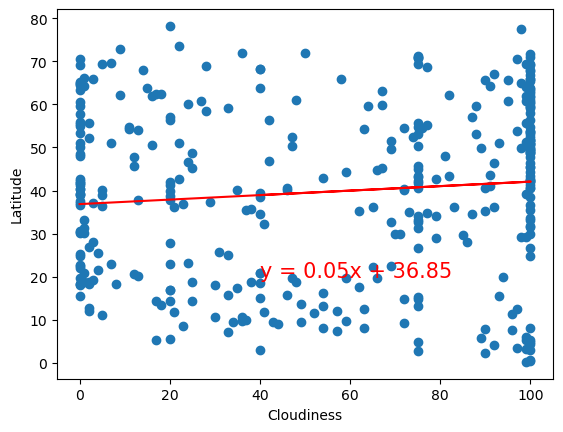

In [23]:
# Northern Hemisphere
x_values = northern_hemi_df['Cloudiness']
y_values = northern_hemi_df["Lat"]


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,20),fontsize=15,color="red")


plt.xlabel('Cloudiness')
plt.ylabel('Latitude')
print(f"The r-squared is: {rvalue**2}")
plt.show()


The r-squared is: 0.035040408384047435


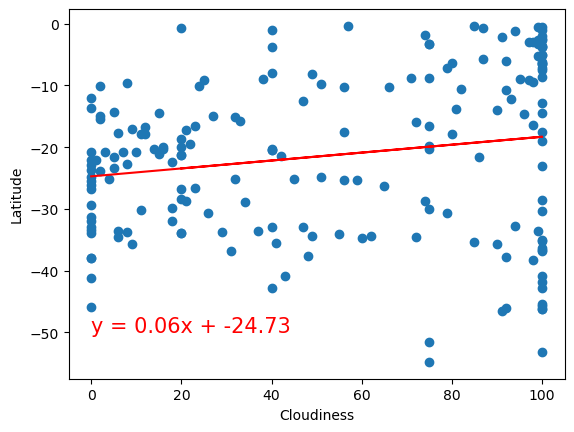

In [24]:
# Southern Hemisphere
x_values = southern_hemi_df['Cloudiness']
y_values = southern_hemi_df["Lat"]


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,-50),fontsize=15,color="red")


plt.xlabel('Cloudiness')
plt.ylabel('Latitude')
print(f"The r-squared is: {rvalue**2}")
plt.show()


**Discussion about the linear relationship:** The line is even flatter in this scenario. One could argure that as latitude increases the level of cloudiness has no impact. Additionally, I think other factor play a role in clouidness such as season and the level of humidity

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.0008639127984262652


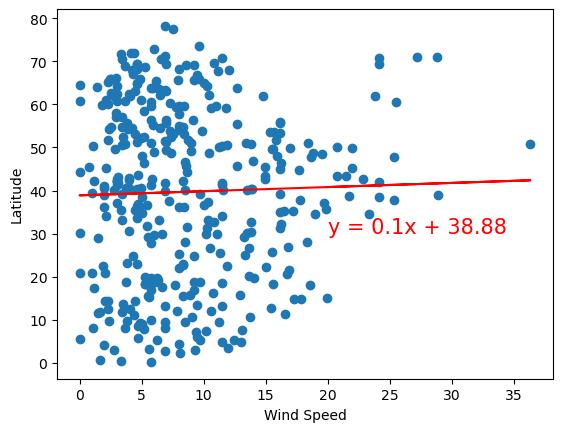

In [25]:
# Northern Hemisphere
x_values = northern_hemi_df['Wind Speed']
y_values = northern_hemi_df["Lat"]


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,30),fontsize=15,color="red")


plt.xlabel('Wind Speed')
plt.ylabel('Latitude')
print(f"The r-squared is: {rvalue**2}")
plt.show()


The r-squared is: 0.09242262414039394


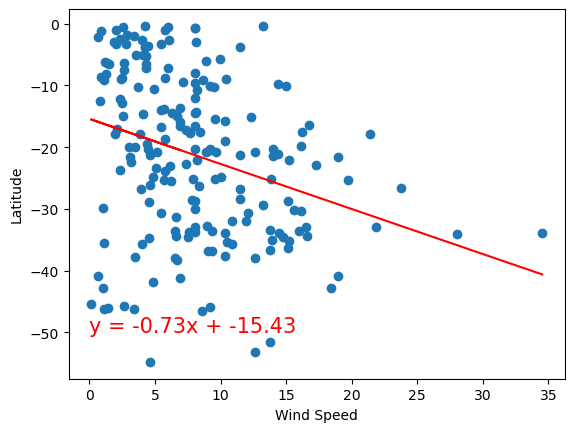

In [26]:
# Southern Hemisphere
x_values = southern_hemi_df['Wind Speed']
y_values = southern_hemi_df["Lat"]


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,-50),fontsize=15,color="red")


plt.xlabel('Wind Speed')
plt.ylabel('Latitude')
print(f"The r-squared is: {rvalue**2}")
plt.show()


**Discussion about the linear relationship:** According to the graph there is a closer relationship to wind speed as you go south away from the equator but I'm not confident that that's the true cause of windspeed. Additionally as you more north of the equator the line of best fit is flat so I don't think as you move away from the equator the level of wind speed will increase. 